## Import dependencies

In [1]:
import os
import matplotlib.pyplot as plt
from phys2bids.phys2bids import phys2bids
from peakdet import Physio, operations, io

## Convert our raw acq file in bids format

To convert our raw acq file in bids format, we will use `phys2bids`. This library can be use as a CLI directly in the terminal or inside a python script or jupyter notebook. For more details, take a look at the [documentation](https://phys2bids.readthedocs.io/en/latest/) !

### Get to know phys2bids

In [8]:
!phys2bids -h

usage: phys2bids [-h] -in FILENAME [-info] [-indir INDIR] [-outdir OUTDIR]
                 [-heur HEUR_FILE] [-sub SUB] [-ses SES] [-chtrig CHTRIG]
                 [-chsel [CHSEL ...]] [-ntp [NUM_TIMEPOINTS_EXPECTED ...]]
                 [-tr [TR ...]] [-thr THR] [-pad PAD] [-chnames [CH_NAME ...]]
                 [-yml YML] [-debug] [-quiet] [-v]

Required Argument::
  -in FILENAME, --input-file FILENAME
                        The name of the file containing physiological data,
                        with or without extension.

optional arguments:
  -h, --help            show this help message and exit
  -info, --info         Only output info about the file, don't process.
                        Default is to process.
  -indir INDIR, --input-dir INDIR
                        Folder containing input. Default is current folder.
  -outdir OUTDIR, --output-dir OUTDIR
                        Folder where output should be placed. Default is
                        current folder. If 

### Let's deal with some data

In [34]:
# Checkout the file info

outdir = 'data/multifreq_bids' # Definining the directory where the output will be saved

phys2bids(
    'data/multifreq.acq',
    info = True,
    outdir = outdir,
)

INFO       Currently running phys2bids version 2.10.0
INFO       Input file is data/multifreq.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /home/user/Documents/physio/ohbm2023noisetutorial/data/multifreq.acq
INFO       00. Channel RESP - RSP100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       01. Channel PULSE - Custom, DA100C: 83550 samples, 625.0 samples/sec, loaded: True
INFO       02. Channel MR TRIGGER - Custom, HLT100C - A 5: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       03. Channel PPG100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       04. Channel CO2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       05. Channel O2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       Running automatic trigger detection.
INFO       Matching channel names with known trigger names first.
INFO       MR TRIGGER - Custom, HLT100C - A 5

<div class="alert alert-block alert-info">
<b>CLI version</b>
<pre><code>phys2bids -in data/multifreq.acq -out data/multifreq_bids -info</code></pre>
</div>

In [35]:
# Let's check what we have inside our output directory
def print_tree(outdir):
    # Adapted from: https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
    for root, dirs, files in os.walk(outdir):
        level = root.replace(outdir, '').count(os.sep)
        print(f"{' ' * 4*level}{os.path.basename(root)}")
        for file in files:
            print(f"{' ' * 4*(level+1)}{os.path.basename(file)}")


print_tree(outdir)

multifreq_bids
    .ipynb_checkpoints
    code
        conversion
            call.sh
            phys2bids_2024-10-29T203610.tsv
            multifreq.png


In [36]:
# Let's bids-ify the data
phys2bids(
    'data/multifreq.acq',
    info = False,
    outdir = 'data/multifreq_bids',
    num_timepoints_expected = 60,
    tr = 1.5,
    chsel = [1, 2, 3, 4],
    sub = '002',
    ses = '01',
    heur_file = 'data/heur_tutorial.py'
)

INFO       Currently running phys2bids version 2.10.0
INFO       Input file is data/multifreq.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /home/user/Documents/physio/ohbm2023noisetutorial/data/multifreq.acq
INFO       00. Channel RESP - RSP100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       01. Channel PULSE - Custom, DA100C: 83550 samples, 625.0 samples/sec, loaded: True
INFO       02. Channel MR TRIGGER - Custom, HLT100C - A 5: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       03. Channel PPG100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       04. Channel CO2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       05. Channel O2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       Running automatic trigger detection.
INFO       Matching channel names with known trigger names first.
INFO       MR TRIGGER - Custom, HLT100C - A 5

<div class="alert alert-block alert-info">
<b>CLI version</b>
<pre><code>phys2bids -in data/multifreq.acq -out data/multifreq_bids -ntp 60 -tr 1.5 -chsel 1 2 3 4 -sub 002 -ses 01 -heur data/heur_tutorial.py</code></pre>
</div>

In [37]:
# Let's check what we have now inside our output directory
print_tree(outdir)

multifreq_bids
    dataset_description.json
    README
    participants.tsv
    sub-002
        ses-01
            func
                sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.json
                sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.tsv.gz
                sub-002_ses-01_task-SomeTask_recording-625Hz_physio.json
                sub-002_ses-01_task-SomeTask_recording-625Hz_physio.tsv.gz
    .ipynb_checkpoints
    code
        conversion
            phys2bids_2024-10-29T203614.tsv
            heur_tutorial.py
            call.sh
            phys2bids_2024-10-29T203610.tsv
            sub-002_ses-01_task-SomeTask_recording-625Hz_physio.log
            multifreq.png
            multifreq_sub-002_ses-01_trigger_time.png
            sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.log


## Preprocessing time !

In [ ]:
# TODO: Change to use the output of the phys2bids part

In [2]:
clean_ecg = nk.ecg_simulate(duration=60*3, noise=0, heart_rate=70, random_state=0)

![alt text](figures/ECG_complex.png "ECG complex")

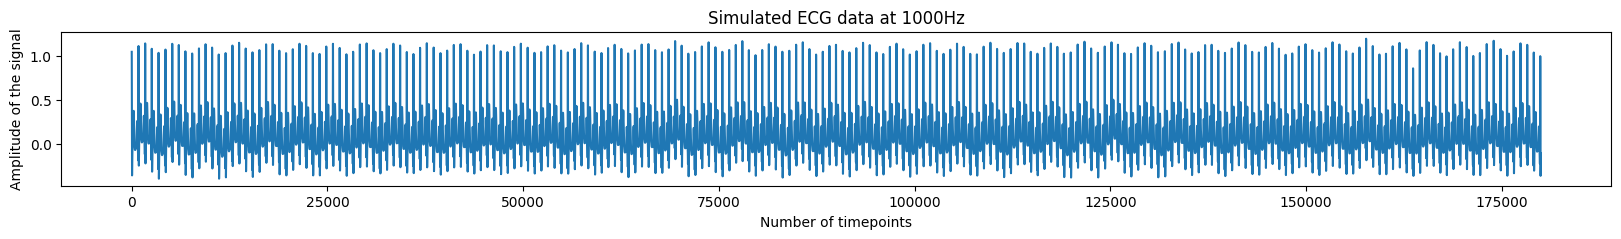

In [3]:
plt.figure(figsize=(20, 2))
plt.plot(clean_ecg)
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')
plt.show()

### Add some noise

In [4]:
dummy_ecg = nk.ecg_simulate(duration=60*3, noise=0.5, heart_rate=70, random_state=0)

## Visualize the signal

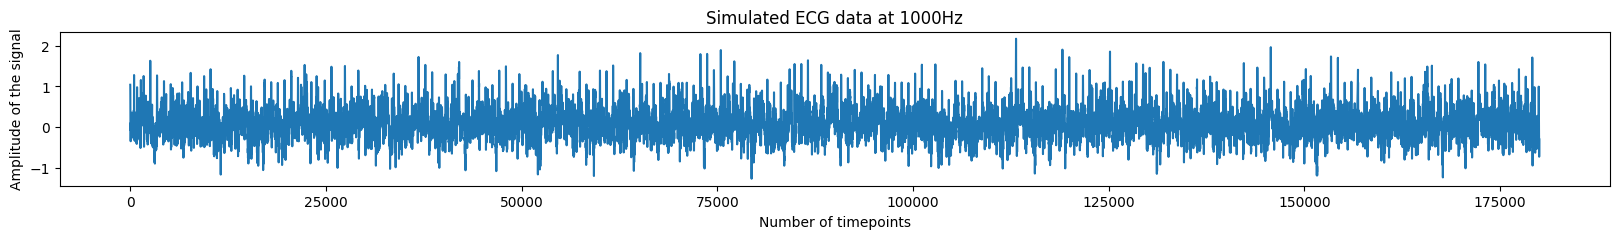

In [5]:
plt.figure(figsize=(20, 2))
plt.plot(dummy_ecg)
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')
plt.show()

[]

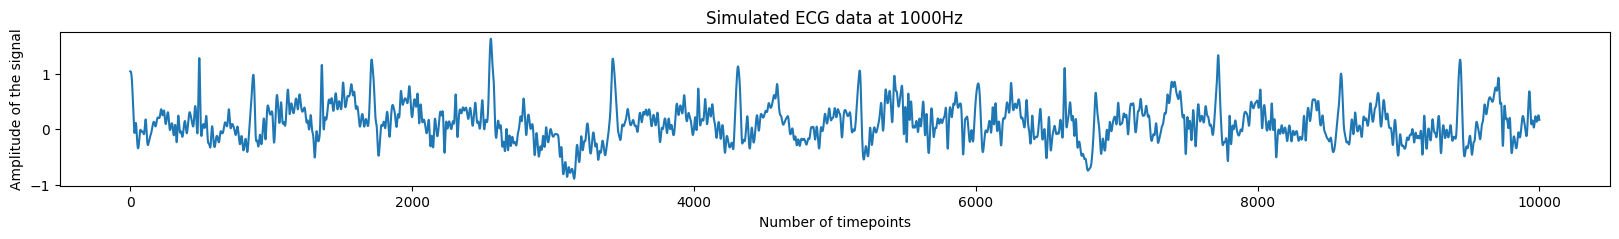

In [6]:
plt.figure(figsize=(20, 2))
plt.plot(dummy_ecg[:10*1000])
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')
plt.plot()

## Create a Physio object

In [7]:
phys_ecg = Physio(dummy_ecg, fs=1000)
print(phys_ecg)

Physio(size=180000, fs=1000.0)


## Let's try cleaning our signal

In [8]:
phys_ecg = operations.filter_physio(phys_ecg, cutoffs=[0.5, 35], method='bandpass')
print(phys_ecg.history)

[('filter_physio', {'cutoffs': [0.5, 35], 'method': 'bandpass'})]


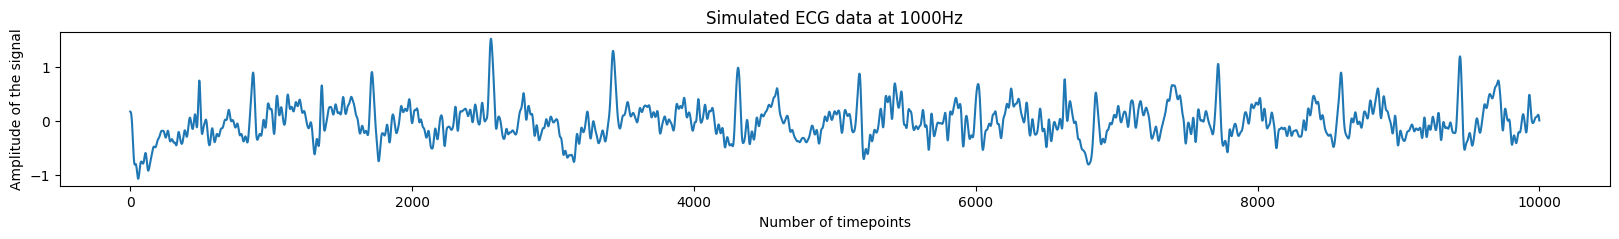

In [9]:
plt.figure(figsize=(20, 2))
plt.plot(phys_ecg.data[:10*1000])
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')
plt.show()

## We can now find our R peaks !

In [10]:
phys_ecg = operations.peakfind_physio(phys_ecg)

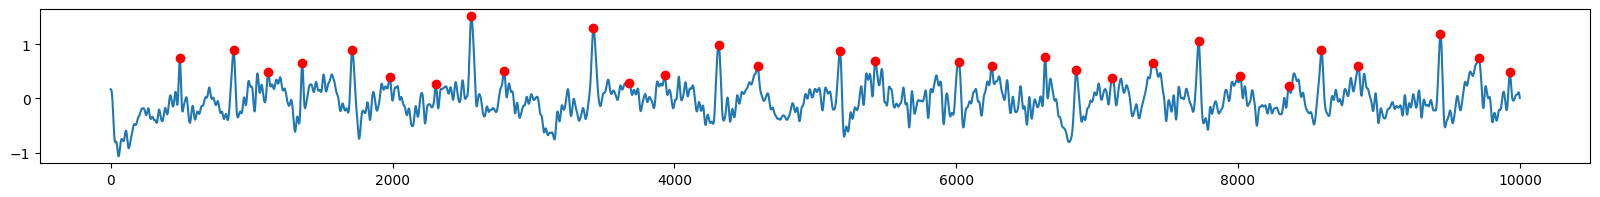

In [11]:
plt.figure(figsize=(20, 2))
plt.plot(phys_ecg.data[:10*1000])
peaks_idx = phys_ecg.peaks[phys_ecg.peaks<10*1000]
plt.plot(peaks_idx, phys_ecg.data[peaks_idx], 'ro')
plt.show()

In [12]:
peaks_idx.shape

(30,)

<div class="alert alert-block alert-info">
<b>Wait... Does that make sense ?</b>
<br>We have more than 20 peaks for 10 secondes, which means that we have an heart rate above 120 bpm ! Although not physiologically impossible, it is not what we should expect. Indeed, when we created our simulated signals, we have specified a desired heart rate of 70 bpm...
</div>

## Automation is useful, but manual check is necessary !

In [13]:
# Does not work completely in jupyter notebook
%matplotlib qt
phys_ecg = operations.edit_physio(phys_ecg)

**Let's check what is now happening in the history of our Physio object**

In [14]:
phys_ecg.history

[('filter_physio', {'cutoffs': [0.5, 35], 'method': 'bandpass'}),
 ('peakfind_physio', {}),
 ('delete_peaks',
  {'remove': [13971,
    14327,
    14560,
    14794,
    15429,
    15669,
    16131,
    16576,
    16783,
    17162,
    17394,
    17728,
    18006,
    18269,
    18853,
    19066,
    19302,
    19713,
    20062,
    20577,
    20874,
    21429]}),
 ('add_peaks', {'add': [19713, 20577]})]

In [15]:
# Let's save our hard work !
save_physio('data/sub-test_ses-test_task-test_run-test_desc-peaks.phys', phys_ecg)

'data/sub-test_ses-test_task-test_run-test_desc-peaks.phys'

## Preparing physiological models

In [16]:
# To extract metrics from our signal, we'll use `phys2denoise`
from phys2denoise.metrics import heart_rate_variability
from phys2denoise.metrics.utils import export_metric

In [17]:
phys_ecg = load_physio('data/sub-test_ses-test_task-test_run-test_desc-peaks.phys', allow_pickle=True)
print(phys_ecg.history)

[('filter_physio', {'cutoffs': [0.5, 35], 'method': 'bandpass'}), ('peakfind_physio', {}), ('delete_peaks', {'remove': [13971, 14327, 14560, 14794, 15429, 15669, 16131, 16576, 16783, 17162, 17394, 17728, 18006, 18269, 18853, 19066, 19302, 19713, 20062, 20577, 20874, 21429]}), ('add_peaks', {'add': [19713, 20577]})]


In [18]:
hrv = heart_rate_variability(phys_ecg.data, phys_ecg.peaks, phys_ecg.fs)

In [19]:
plt.figure(figsize=(20, 2))
plt.plot(hrv, label=["hrv", "convolved hrv"])
plt.legend(loc="lower right")
plt.show()

In [20]:
export_metric(
    hrv, phys_ecg.fs, tr=1.5, fileprefix="data/sub-test_ses-test_task-test_run-test_desc-hrv"
)

'data/sub-test_ses-test_task-test_run-test_desc-hrv'

<div class="alert alert-block alert-info">
<b>Variability in heart rate variability</b>
<br> There are different ways to calculate <b>hrv</b>. Currently, <i>phys2denoise</i> is computing the average of the inverse of the time interval
between two heart beats.
</div>

## Wanna contribute ?

In [21]:
from IPython.display import IFrame
IFrame("https://physiopy.github.io/contributors-guide/", 900,500)